**Sales Price Prediction**

In [ ]:
from google.colab import files
u=files.upload()

Saving archive (5).zip to archive (5).zip


In [ ]:
#Extracting the zip file
import zipfile
zip=zipfile.ZipFile("/content/archive (5).zip","r")
zip.extractall('/content')
zip.close()

In [85]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load the dataset
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [88]:
#Checking any Null Values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [89]:
#Checking any Duplicated Values
data.duplicated().sum()

0

In [90]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [91]:
# Defining the features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [92]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [93]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [94]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creating a Linear Regression Model**

In [95]:
model = LinearRegression()
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [96]:
# Making predictions on the test set
y_pred = model.predict(X_test)

**Evaluating the Model**

In [97]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 3.1740973539761033
Mean Absolute Error: 1.4607567168117603
R-squared Score: 0.899438024100912


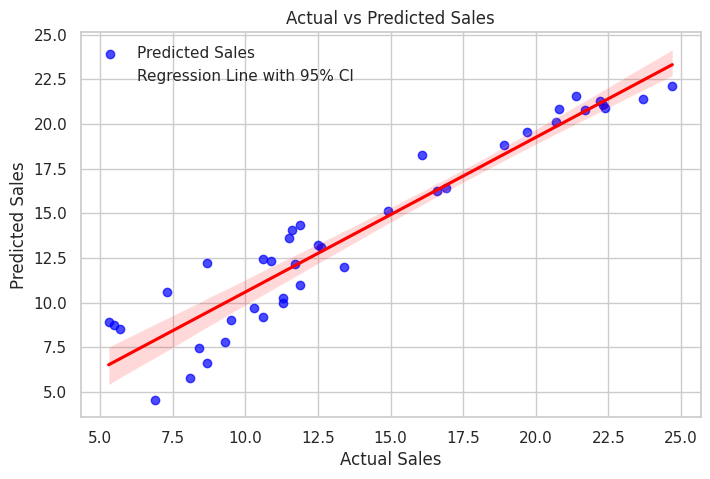

In [98]:
# Creating regression line plots with lmplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting the predicted vs actual values with different colors
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted Sales')
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0}, line_kws={'color': 'red'}, ci=95, label='Regression Line with 95% CI')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


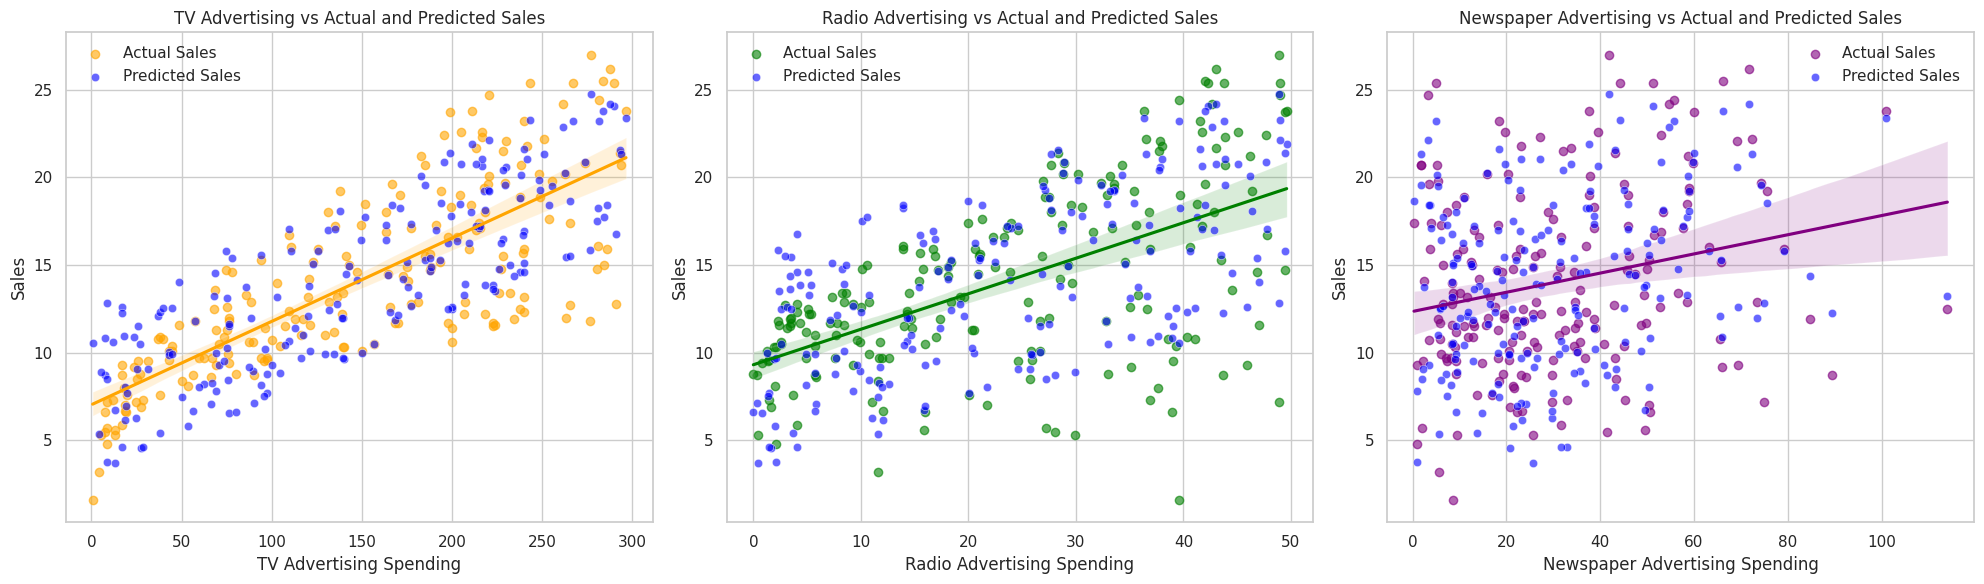

In [99]:
# Creating regression line plots with lmplot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# TV advertising vs. Actual and Predicted Sales
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=data, color='orange', scatter_kws={'alpha':0.6}, label='Actual Sales')
sns.scatterplot(x=data['TV'], y=model.predict(data[['TV', 'Radio', 'Newspaper']]), color='blue', alpha=0.6, label='Predicted Sales')
plt.legend()
plt.title('TV Advertising vs Actual and Predicted Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')

# Radio advertising vs. Actual and Predicted Sales
plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=data, color='green', scatter_kws={'alpha':0.6}, label='Actual Sales')
sns.scatterplot(x=data['Radio'], y=model.predict(data[['TV', 'Radio', 'Newspaper']]), color='blue', alpha=0.6, label='Predicted Sales')
plt.legend()
plt.title('Radio Advertising vs Actual and Predicted Sales')
plt.xlabel('Radio Advertising Spending')
plt.ylabel('Sales')

# Newspaper advertising vs. Actual and Predicted Sales
plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=data, color='purple', scatter_kws={'alpha':0.6}, label='Actual Sales')
sns.scatterplot(x=data['Newspaper'], y=model.predict(data[['TV', 'Radio', 'Newspaper']]), color='blue', alpha=0.6, label='Predicted Sales')
plt.legend()
plt.title('Newspaper Advertising vs Actual and Predicted Sales')
plt.xlabel('Newspaper Advertising Spending')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()
